# 0. SETUP

In [1]:
!git clone https://github.com/nathanhubens/MultimedIA.git

Cloning into 'MultimedIA'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 178 (delta 58), reused 86 (delta 28), pack-reused 52
Receiving objects: 100% (178/178), 112.70 MiB | 31.51 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [10]:
cd MultimedIA/Lesson\ 2

/content/MultimedIA/Lesson 2


In [3]:
!pip install fastai==2.5.1

     |████████████████████████████████| 188 kB 5.4 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [6]:
from fastai.vision.all import *
from nn import *
import warnings
warnings.filterwarnings('ignore')

In [8]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 1.2 MB 24.6 MB/s 
     |████████████████████████████████| 51 kB 297 kB/s 
Mounted at /content/gdrive


In [11]:
from fastbook import *
from utils import *

In [12]:
cd ../..

/content


In [19]:
def download_categories(path, categories, n_images):
  if not path.exists():
    path.mkdir()
    for o in categories:
      dest = (path/o)
      dest.mkdir(exist_ok=True)
      urls = search_images_ddg(f' {o} ', max_images=n_images)
      download_images(dest, urls=urls)

def check_images(path):
  fns = get_image_files(path)
  failed = verify_images(fns)
  failed.map(Path.unlink);

# 1. GET DATA

In [27]:
# Choisis tes catégories
categories = 'Homer Simpson', 'Marge Simpson', 'Bart Simpson', 'Lisa Simpson'

In [28]:
path = Path('cats')

In [29]:
download_categories(path, categories, n_images=100)

In [30]:
check_images(path)

In [31]:
image_size = 128

In [32]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(image_size))

In [33]:
dls = db.dataloaders(path)

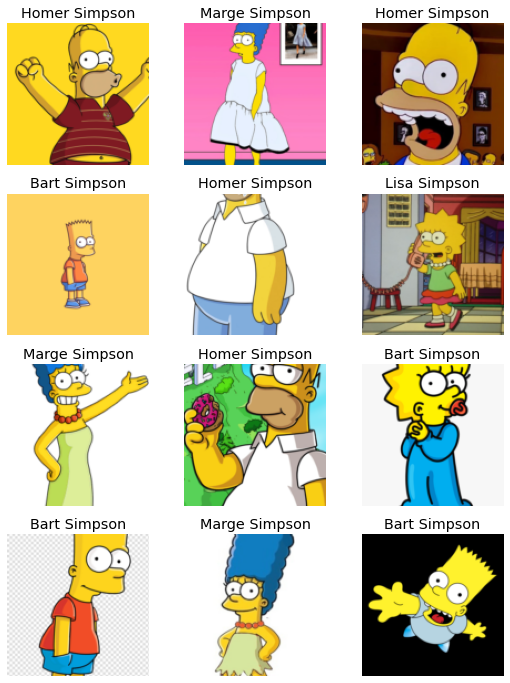

In [34]:
dls.valid.show_batch(max_n=12, nrows=4) 

# 2. TRAIN MODEL

In [55]:
n_features = 64
n_classes = 4

In [56]:
model = CNNModel(n_features, n_classes)

In [57]:
count_parameters(model)

Number of parameters: 2,472,576


In [58]:
learn = Learner(dls, model, metrics=accuracy)
learn.fine_tune(epochs=10)

epoch,train_loss,valid_loss,accuracy,time
0,1.382438,1.383770,0.243243,00:15


epoch,train_loss,valid_loss,accuracy,time
0,1.383224,1.391596,0.189189,00:14
1,1.374887,1.360503,0.351351,00:15
2,1.342108,2.452414,0.216216,00:15
3,1.376109,1.240166,0.472973,00:15
4,1.356861,1.285387,0.391892,00:15
5,1.329892,1.191305,0.513514,00:15
6,1.305817,1.104761,0.554054,00:15
7,1.276414,1.083086,0.540541,00:14
8,1.248202,1.084463,0.581081,00:15
9,1.229223,1.084112,0.581081,00:15


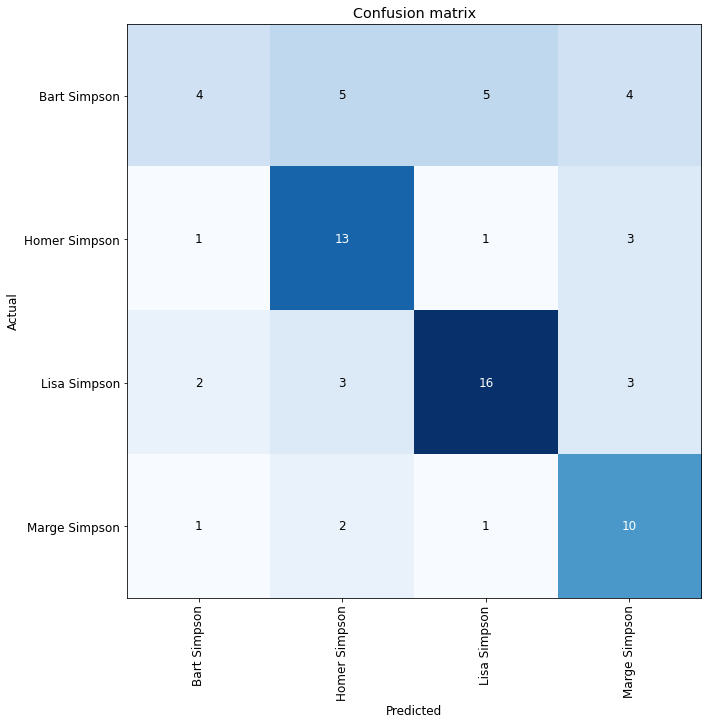

In [59]:
from IPython.core.pylabtools import figsize 
interp = ClassificationInterpretation.from_learner(learn) 
interp.plot_confusion_matrix(figsize=(10,10))

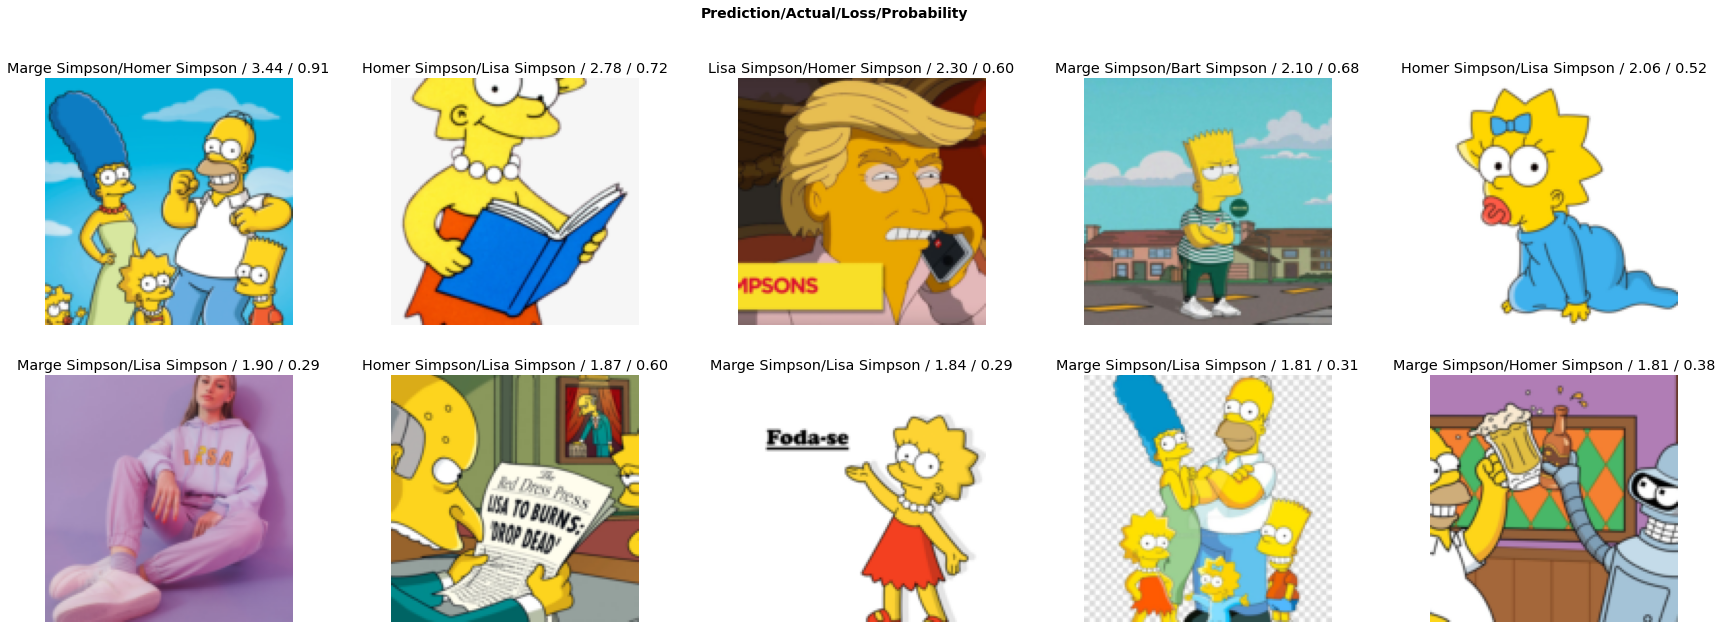

In [60]:
interp.plot_top_losses(10, nrows=2, figsize=(30,10))

## Exercices to try: 

Train your models for more epochs, what happens ? (★☆☆)

If you change the values of `n_features`, what happens ? (★☆☆)

Change the image size, what happens ? (★☆☆)

Do you see a relation between the number of parameters and the final accuracy ? (★☆☆)

Go to the source code of `nn.py` and get the `CNNModel` code. Remove the non-linearities (ReLU) from the `forward` method. What happens if you train the network now ? (★★☆)

Try to add more layers to the networks and to see what happens (★★★)

Choose a new network (e.g. ResNet50) and train with it (★★☆)